In [2]:
# Standard
import numpy as np
import pandas as pd
from numpy.random import randn

# Statistics
import scipy as stats

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore warning

#import warnings
#warnings.filterwarnings('ignore')

(array([ 5.,  9., 13., 19., 22., 16.,  6.,  4.,  5.,  1.]),
 array([-2.12406885, -1.66251251, -1.20095618, -0.73939984, -0.2778435 ,
         0.18371284,  0.64526917,  1.10682551,  1.56838185,  2.02993819,
         2.49149453]),
 <a list of 10 Patch objects>)

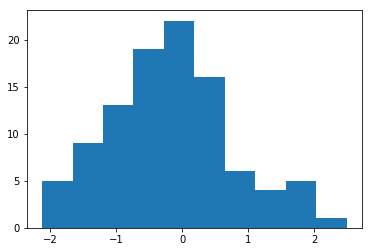

In [10]:
#Create a random normal-dist dataset
dataset1 = randn(100)

#Plot a histogram of the dataset, note bins=10 by default
plt.hist(dataset1)

(array([ 1.,  1.,  6., 16., 10., 16., 16.,  4.,  3.,  7.]),
 array([-2.5578329 , -2.08567145, -1.61351   , -1.14134855, -0.66918711,
        -0.19702566,  0.27513579,  0.74729724,  1.21945868,  1.69162013,
         2.16378158]),
 <a list of 10 Patch objects>)

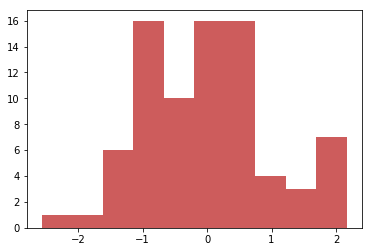

In [11]:
# Lets make another dataset
dataset2 = randn(80)

#Plot
plt.hist(dataset2,color='indianred')

(array([ 1.,  0.,  0.,  1.,  2.,  4.,  7.,  9.,  7.,  3.,  7.,  9., 10.,
         6.,  1.,  3.,  1.,  2.,  5.,  2.]),
 array([-2.5578329 , -2.32175217, -2.08567145, -1.84959073, -1.61351   ,
        -1.37742928, -1.14134855, -0.90526783, -0.66918711, -0.43310638,
        -0.19702566,  0.03905506,  0.27513579,  0.51121651,  0.74729724,
         0.98337796,  1.21945868,  1.45553941,  1.69162013,  1.92770086,
         2.16378158]),
 <a list of 20 Patch objects>)

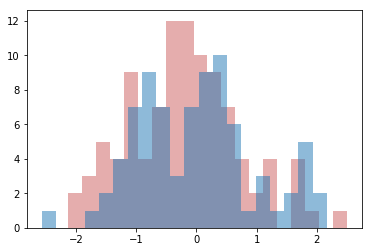

In [16]:
# We can use normed to plot on same plot

# Set normed=True for the plots to be normalized in order to comapre data sets with different number of observations
# Set alpha=0.5 for transperancy

plt.hist(dataset1,color='indianred',alpha=0.5,bins=20)
plt.hist(dataset2,alpha=0.5,bins=20)

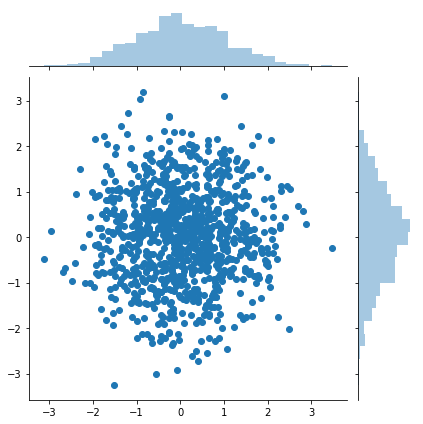

In [80]:
# Make two more random normal dist data sets
data1 = randn(1000)
data2 = randn(1000)

#Can represent joint distributions using joint plots
sns.jointplot(data1,data2)

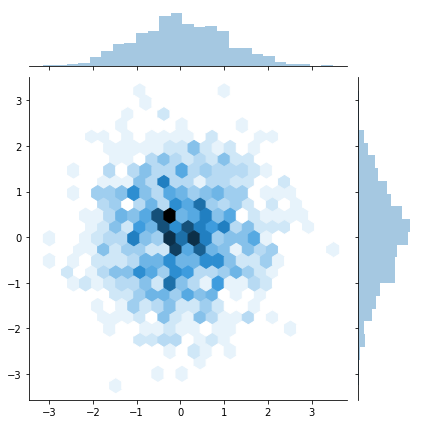

In [81]:
# Can also use hex bins for a more concise picture
sns.jointplot(data1,data2,kind='hex')

In [39]:
dataset = randn(1000)

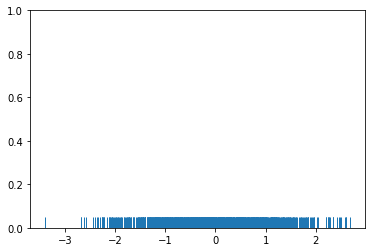

In [40]:
sns.rugplot(dataset)

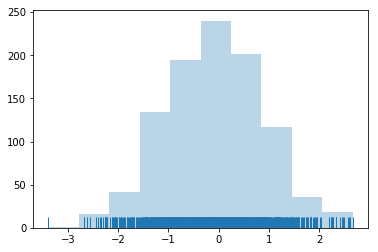

In [41]:
plt.hist(dataset,alpha=.3)
sns.rugplot(dataset)

(0, 1)

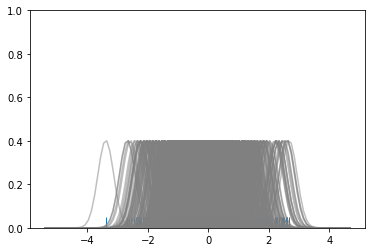

In [58]:
from scipy.stats import norm

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

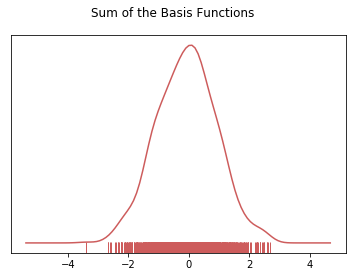

In [63]:
# To get the kde plot we can sum these basis functions.



# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

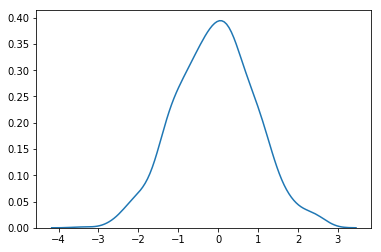

In [82]:
# Now we can see how to do it in one step with seaborn! Awesome!
sns.kdeplot(dataset)

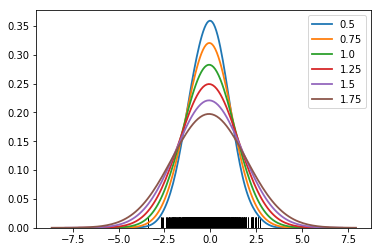

In [65]:
# We can adjust the bandwidth of the sns kde to make the kde plot more or less sensitive to high frequency

# Rugplot
sns.rugplot(dataset,color='black')

# Plot various bandwidths
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

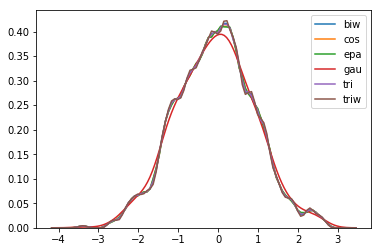

In [83]:
# We can also choose different kernels

kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

# More info on types
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

# Use label to set legend
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

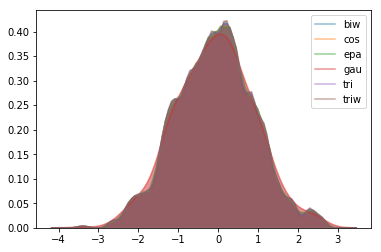

In [84]:
# We can also shade if desired
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

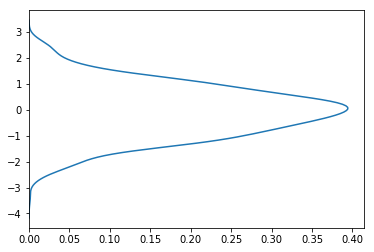

In [85]:
# For vertical axis, use the vertical keyword
sns.kdeplot(dataset,vertical=True)

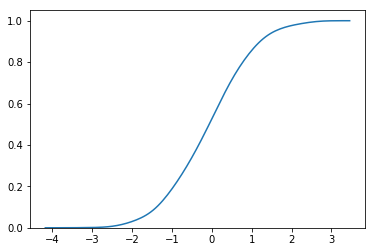

In [86]:
# Finally we can also use kde plot to create a cumulative distribution function (CDF) of the data

# URL for info on CDF
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

sns.kdeplot(dataset,cumulative=True)

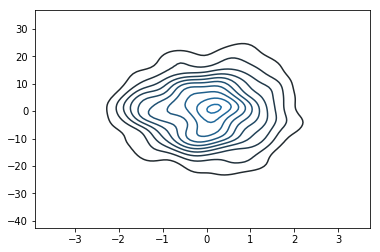

In [87]:

# Let's create a new dataset

# Mean center of data
mean = [0,0]

# Diagonal covariance
cov = [[1,0],[0,100]]

# Create dataset using numpy
dataset2 = np.random.multivariate_normal(mean,cov,1000)

# Bring back our old friend pandas
dframe = pd.DataFrame(dataset2,columns=['X','Y'])

# Plot our dataframe
sns.kdeplot(dframe)

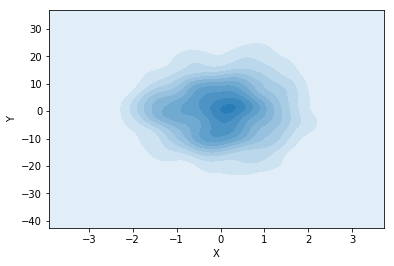

In [88]:
# We could have also passed two vectors seperately, and shade
sns.kdeplot(dframe.X,dframe.Y,shade=True)

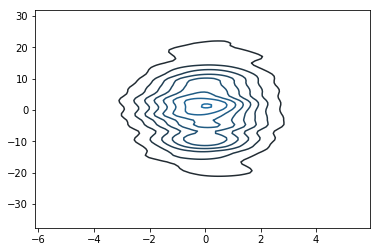

In [89]:
# Can specify a particualr bandwidth
sns.kdeplot(dframe,bw=1)

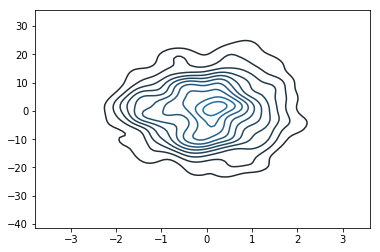

In [90]:
# Or just use silverman again
sns.kdeplot(dframe,bw='silverman')

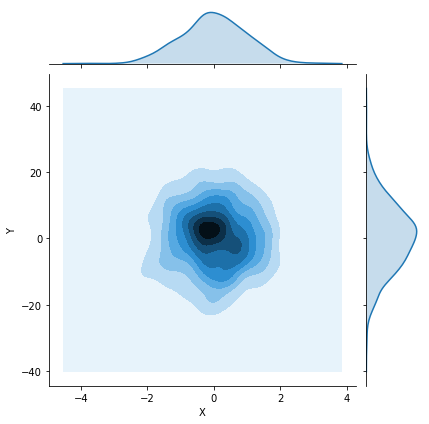

In [79]:
# We can also create a kde joint plot, simliar to the hexbin plots we saw before
sns.jointplot('X','Y',dframe,kind='kde')

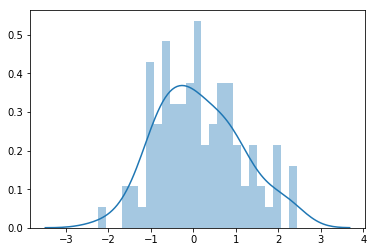

In [93]:
# Create datset
dataset = randn(100)

# Use distplot for combining plots, by default a kde over a histogram is shown
sns.distplot(dataset,bins=25)

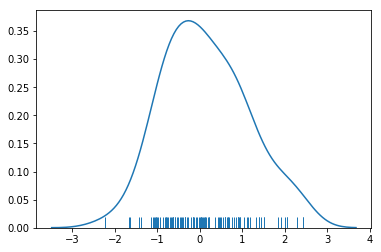

In [94]:
# hist, rug, and kde are all input arguments to turn those plots on or off
sns.distplot(dataset,rug=True,hist=False)

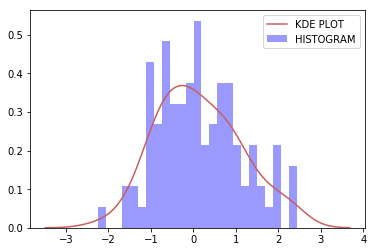

In [95]:
# TO control specific plots in distplot, use [plot]_kws argument with dictionaries.

#Here's an example

sns.distplot(dataset,bins=25,
             kde_kws={'color':'indianred','label':'KDE PLOT'},
             hist_kws={'color':'blue','label':"HISTOGRAM"})

In [96]:
# WE can also use pandas data objects for this

from pandas import Series

# Create Series form dataset
ser1 = Series(dataset,name='My_DATA')

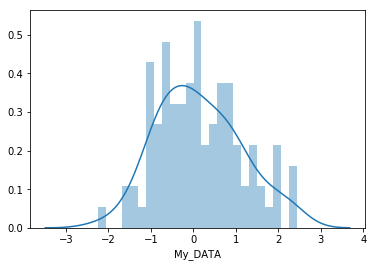

In [97]:
# Plot Series
sns.distplot(ser1,bins=25)

In [100]:
# Now we'll learn about box and violin plots
url = 'http://en.wikipedia.org/wiki/Box_plot#mediaviewer/File:Boxplot_vs_PDF.svg'

# Let's create two distributions
data1 = randn(100)
data2 = randn(100) + 2 # Off set the mean

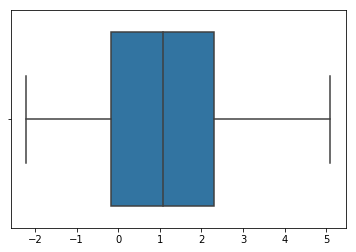

In [105]:
# Now we can create a box plot
sns.boxplot([data1,data2])

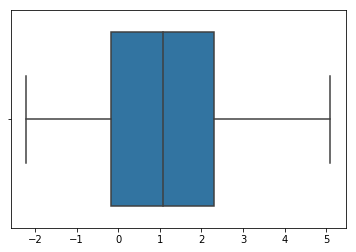

In [101]:

# Notice how the previous plot had outlier points, we can include those with the "whiskers"
sns.boxplot([data1,data2],whis=np.inf)

In [106]:
tips = sns.load_dataset("tips")

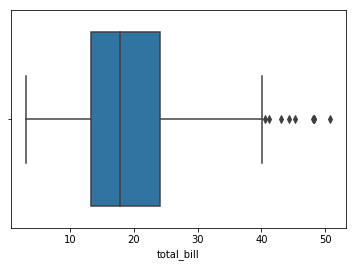

In [107]:
ax = sns.boxplot(x=tips["total_bill"])

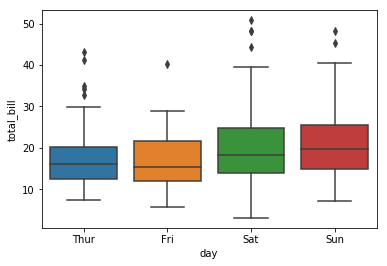

In [108]:
sns.boxplot(x="day", y="total_bill", data=tips)

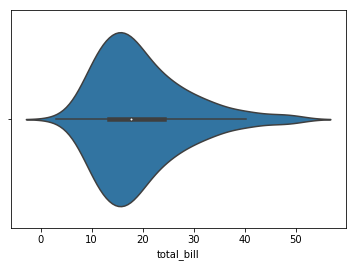

In [109]:
 sns.violinplot(x=tips["total_bill"])

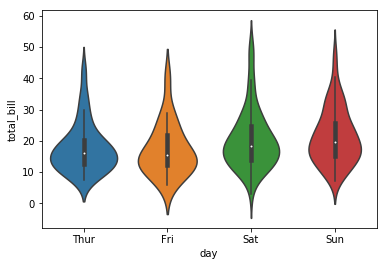

In [110]:
sns.violinplot(x="day", y="total_bill", data=tips)

In [111]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


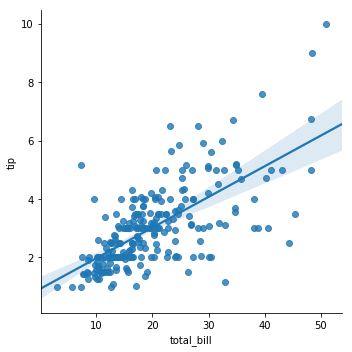

In [113]:
sns.lmplot('total_bill','tip',tips)

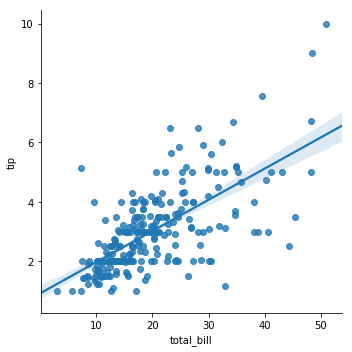

In [114]:
# WE can also specify teh confidence interval to use for the linear fit

sns.lmplot("total_bill","tip",tips,ci=75) # 68% ci

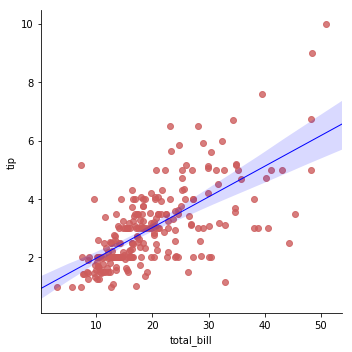

In [115]:
# Just like before, we can use dictionaries to edit individual parts of the plot

sns.lmplot("total_bill", "tip", tips,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"});

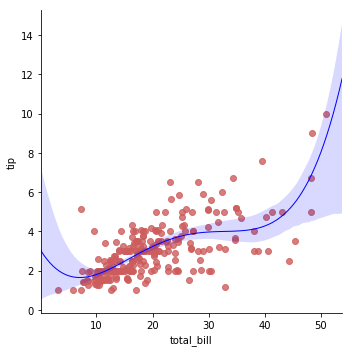

In [116]:

# WE can also check out higher-order trends
sns.lmplot("total_bill", "tip", tips,order=4,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"})

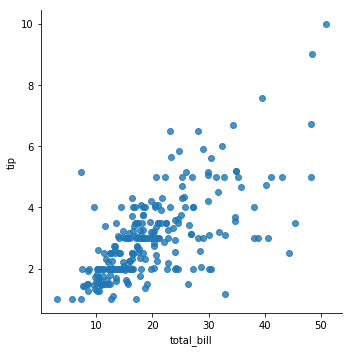

In [117]:
# We can also not fit a regression if desired
sns.lmplot("total_bill", "tip", tips,fit_reg=False)

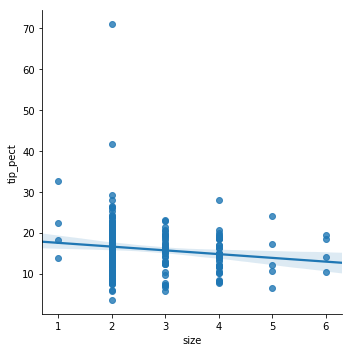

In [118]:
# lmplot() also works on discrete variables, such as the percentage of the tip

# Create a new column for tip percentage
tips["tip_pect"]=100*(tips['tip']/tips['total_bill'])

#plot
sns.lmplot("size", "tip_pect", tips);

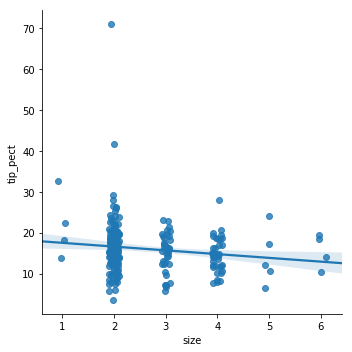

In [119]:
# We can also add jitter to this

#Info link
url = "http://en.wikipedia.org/wiki/Jitter"

#plot
sns.lmplot("size", "tip_pect", tips,x_jitter=.1);

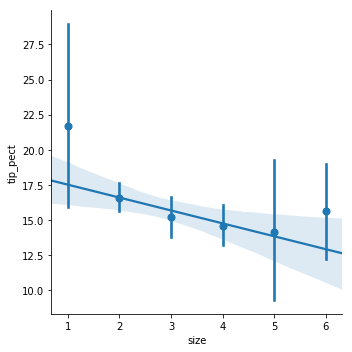

In [120]:
# We can also estimate the tendency of each bin (size of party in this case)
sns.lmplot("size", "tip_pect", tips, x_estimator=np.mean);

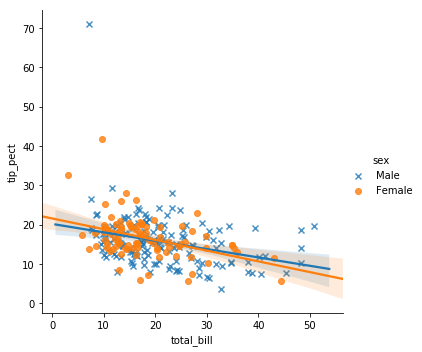

In [121]:
# We can use the hue facet to automatically define subsets along a column

# Plot, note the markers argument
sns.lmplot("total_bill", "tip_pect", tips, hue="sex",markers=["x","o"])

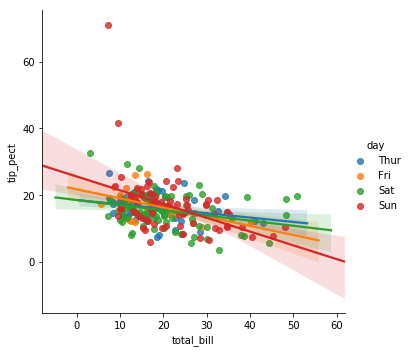

In [122]:
# Does day make a difference?
sns.lmplot("total_bill", "tip_pect", tips, hue="day")

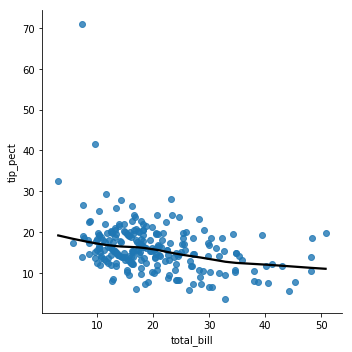

In [123]:

# Finally it should be noted that Seabron supports LOESS model fitting
url = 'http://en.wikipedia.org/wiki/Local_regression'

sns.lmplot("total_bill", "tip_pect", tips, lowess=True, line_kws={"color": 'black'});

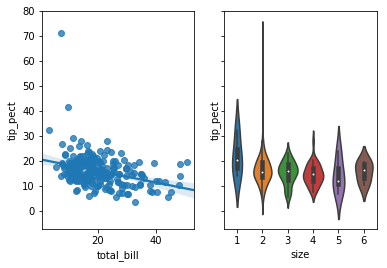

In [136]:
# reg_plot can be added to existing axes without modifying anything in the figure

# Create figure with 2 subplots
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True)

sns.regplot("total_bill","tip_pect",tips,ax=axis1)
sns.violinplot(tips['size'],tips['tip_pect'],ax=axis2)

In [12]:
# Heatmaps and Clustered Matrices

flight_dframe = sns.load_dataset('flights')

In [13]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [14]:
flight_dframe = flight_dframe.pivot('month','year','passengers')

In [15]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


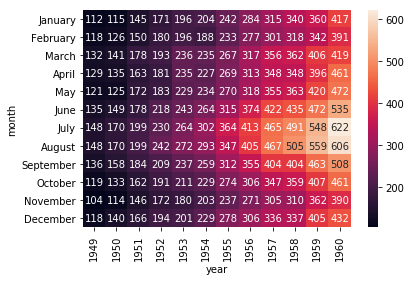

In [24]:
# This dataset is now in a clear format to be dispalyed as a heatmap
sns.heatmap(flight_dframe,annot=True,fmt='d')

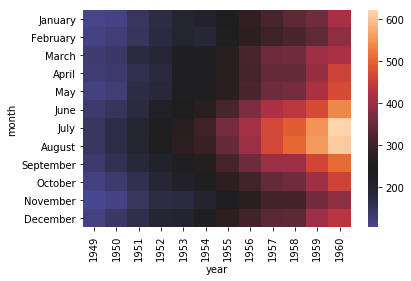

In [26]:
# We can choose our own 'center' for our colormap
sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955])

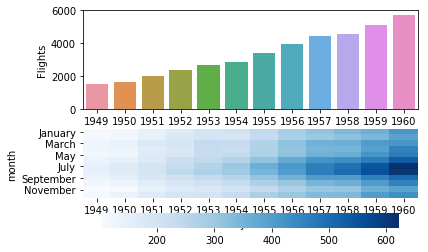

In [27]:
# heatmap() can be used on an axes for a subplot to create more informative figures
f, (axis1,axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

# Since yearly_flights is a weird format, we'll have to grab the values we want with a Series, then put them in a dframe

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values) 
flights = pd.DataFrame(flights)

# Make the dframe and name columns
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']



# Create the bar plot on top
sns.barplot('Year',y='Flights',data=year_dframe, ax = axis1)

# Create the heatmap on bottom
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={"orientation": "horizontal"})

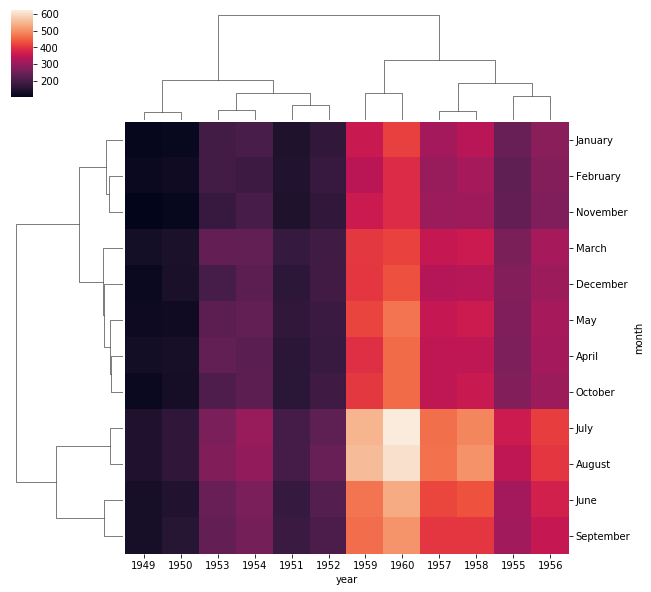

In [28]:

# Finally we'll learn about using a clustermap

# Clustermap will reformat the heatmap so similar rows are next to each other
sns.clustermap(flight_dframe)

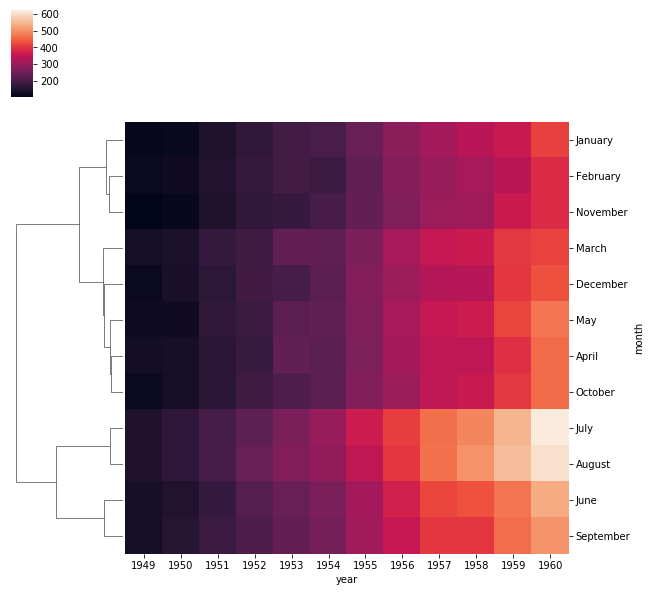

In [29]:
# Let's uncluster the columns
sns.clustermap(flight_dframe,col_cluster=False)

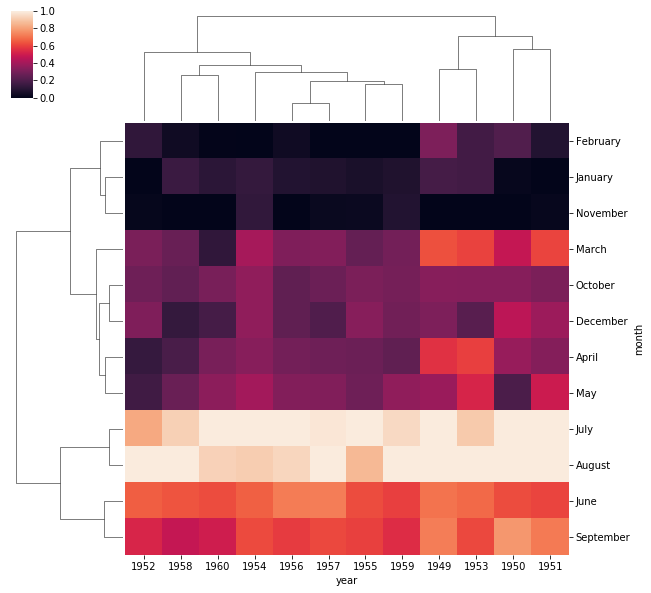

In [30]:
# Since the number of flights increase every year, we should set a standard scale
sns.clustermap(flight_dframe,standard_scale=1) # standardize by columns (year)

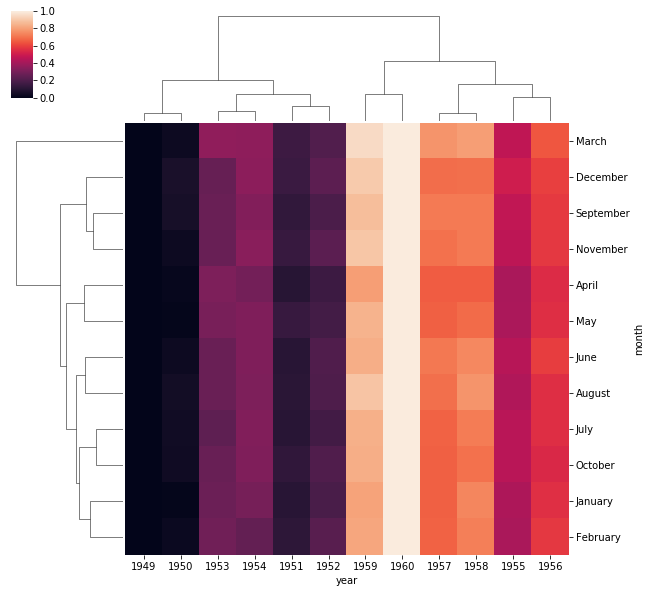

In [31]:
# Or scale the rows
sns.clustermap(flight_dframe,standard_scale=0)

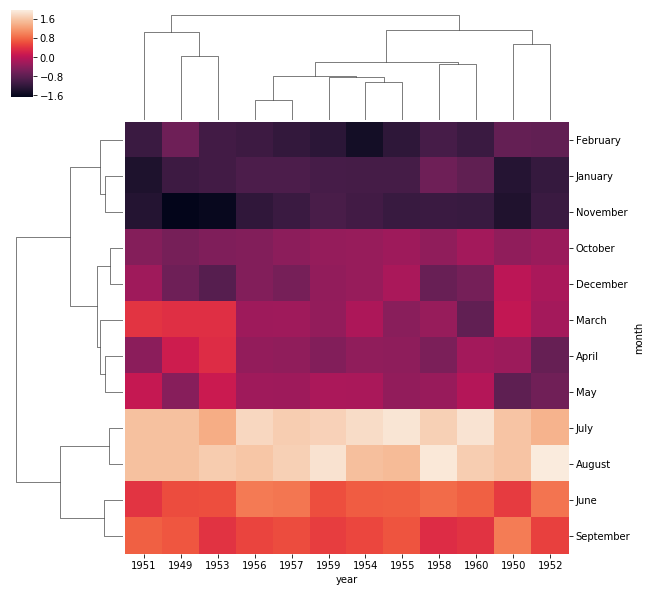

In [32]:

# Finally we can also normalize the rows by their Z-score.
# This subtracts the mean and devides by the STD of each column, then teh rows have amean of 0 and a variance of 1
sns.clustermap(flight_dframe,z_score=1)